In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from unidecode import unidecode
import spacy
import spacy_spanish_lemmatizer
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.cluster import KMeans
stopwords_sp = stopwords.words('spanish')
nlp = spacy.load("es_core_news_sm")

In [2]:
Base = pd.read_excel('SUPERVISADO.xlsx',header=0)
Base.tail(1)


,OPE,nivel,req_estudio_req_experiencia,proposito,funciones
4142,112909,Asistencial,Estudio: Diploma de Bachiller y curso de técn...,Realizar labores de apoyo a los procesos del á...,1. Apoyar la gestión documental del Fondo Depa...


In [3]:
# longitud de terminos en el corpus de cada criterio
temp= []

for i in Base['req_estudio_req_experiencia']:
    temp.append(len (i.split()))

Base['reqcount']=temp

temp1= []

for i in Base['proposito']:
    temp1.append(len (i.split()))

Base['prop_clcount']=temp1

temp2= []

for i in Base['funciones']:
    temp2.append(len (i.split()))

Base['fx_clcount']=temp2
Base

,OPE,nivel,req_estudio_req_experiencia,proposito,funciones,reqcount,prop_clcount,fx_clcount
0,785,Asesor,Estudio: Título profesional en disciplina acad...,"Dirigir la formulación y ejecución de planes, ...","1. Asesorar al alcalde, a las dependencias del...",41,49,230
1,788,Asesor,Estudio: Título de formación profesional en nú...,"Asesorar a la Secretaría de Agricultura, Ganad...",1. Asesorar en la elaboración de los estudios ...,57,42,180
2,789,Asesor,Estudio: Título profesional en núcleo básico d...,Asesorar al Secretario de Hacienda en temas re...,"1. Asesorar a la Secretaría de Hacienda, en te...",54,31,216
3,790,Asesor,Estudio: Título de formación profesional en di...,"Asesorar los planes, programas y proyectos de ...",1. Asesorar a la Secretaría de Salud en el ámb...,61,29,201
4,791,Asesor,Estudio: Título de Formación Profesional en n...,Asesorar los procesos Administrativos y Finan...,1. Asesorar al Despacho del Secretario de Salu...,55,25,280
...,...,...,...,...,...,...,...,...
4138,110944,Profesional,Estudio: Título profesional en disciplina acad...,Agilizar y garantizar eficiencia en los proces...,1. Realizar el proceso completo de contratació...,42,17,260
4139,111001,Asistencial,Estudio: Titulo de bachiller en cualquier moda...,Realizar actividades de apoyo a procesos admin...,4. Atender y orientar al público personal y te...,13,25,110
4140,111006,Asistencial,Estudio: Titulo de bachiller en cualquier moda...,Realizar actividades de apoyo a los procesos a...,1. Elaborar bases de datos que se requieran po...,13,26,112
4141,112643,Tecnico,Estudio: Terminación y aprobación de tres (3) ...,Velar por el orden del flujo vehicular en las ...,1. Ejercer control y vigilancia en el cumplimi...,17,34,300


In [4]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto= unidecode(texto)
    texto = texto.split() # tokenización 
    texto = [palabra for palabra in texto if palabra not in stopwords_sp]
    texto = nlp(str(texto)) # lematización
    text=[]
    for token in texto:        
        text.append(token.lemma_)
    texto = " ".join(text)
    return texto 

In [5]:
%%time
#Limpieza y stopwords requisitos de estudio y experiencia
Base['req_cl']= Base['req_estudio_req_experiencia'].apply(lambda val: pre_procesado(val))
#Limpieza y stopwords proposito
Base['prop_cl']= Base['proposito'].apply(lambda val: pre_procesado(val))
#Limpieza y stopwords funciones 
Base['fx_cl']= Base['funciones'].apply(lambda val: pre_procesado(val))

Wall time: 20min 26s


In [6]:
Base['Contenido_cl']= Base['req_cl']+ Base['prop_cl']+ Base['fx_cl']
Base

,OPE,nivel,req_estudio_req_experiencia,proposito,funciones,reqcount,prop_clcount,fx_clcount,req_cl,prop_cl,fx_cl,Contenido_cl
0,785,Asesor,Estudio: Título profesional en disciplina acad...,"Dirigir la formulación y ejecución de planes, ...","1. Asesorar al alcalde, a las dependencias del...",41,49,230,"[ ' estudio ' , ' titulo ' , ' profesional ' ,...","[ ' dirigir ' , ' formulacion ' , ' ejecucion ...","[ ' asesorar ' , ' alcalde ' , ' dependencia '...","[ ' estudio ' , ' titulo ' , ' profesional ' ,..."
1,788,Asesor,Estudio: Título de formación profesional en nú...,"Asesorar a la Secretaría de Agricultura, Ganad...",1. Asesorar en la elaboración de los estudios ...,57,42,180,"[ ' estudio ' , ' titulo ' , ' formacion ' , '...","[ ' asesorar ' , ' secretaria ' , ' agricultur...","[ ' asesorar ' , ' elaboracion ' , ' estudio '...","[ ' estudio ' , ' titulo ' , ' formacion ' , '..."
2,789,Asesor,Estudio: Título profesional en núcleo básico d...,Asesorar al Secretario de Hacienda en temas re...,"1. Asesorar a la Secretaría de Hacienda, en te...",54,31,216,"[ ' estudio ' , ' titulo ' , ' profesional ' ,...","[ ' asesorar ' , ' secretario ' , ' hacienda '...","[ ' asesorar ' , ' secretaria ' , ' hacienda '...","[ ' estudio ' , ' titulo ' , ' profesional ' ,..."
3,790,Asesor,Estudio: Título de formación profesional en di...,"Asesorar los planes, programas y proyectos de ...",1. Asesorar a la Secretaría de Salud en el ámb...,61,29,201,"[ ' estudio ' , ' titulo ' , ' formacion ' , '...","[ ' asesorar ' , ' plan ' , ' programa ' , ' p...","[ ' asesorar ' , ' secretaria ' , ' salud ' , ...","[ ' estudio ' , ' titulo ' , ' formacion ' , '..."
4,791,Asesor,Estudio: Título de Formación Profesional en n...,Asesorar los procesos Administrativos y Finan...,1. Asesorar al Despacho del Secretario de Salu...,55,25,280,"[ ' estudio ' , ' titulo ' , ' formacion ' , '...","[ ' asesorar ' , ' proceso ' , ' administrativ...","[ ' asesorar ' , ' despacho ' , ' secretario '...","[ ' estudio ' , ' titulo ' , ' formacion ' , '..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4138,110944,Profesional,Estudio: Título profesional en disciplina acad...,Agilizar y garantizar eficiencia en los proces...,1. Realizar el proceso completo de contratació...,42,17,260,"[ ' estudio ' , ' titulo ' , ' profesional ' ,...","[ ' agilizar ' , ' garantizar ' , ' eficiencia...","[ ' realizar ' , ' proceso ' , ' completo ' , ...","[ ' estudio ' , ' titulo ' , ' profesional ' ,..."
4139,111001,Asistencial,Estudio: Titulo de bachiller en cualquier moda...,Realizar actividades de apoyo a procesos admin...,4. Atender y orientar al público personal y te...,13,25,110,"[ ' estudio ' , ' titulo ' , ' bachiller ' , '...","[ ' realizar ' , ' actividad ' , ' apoyo ' , '...","[ ' atender ' , ' orientar ' , ' publico ' , '...","[ ' estudio ' , ' titulo ' , ' bachiller ' , '..."
4140,111006,Asistencial,Estudio: Titulo de bachiller en cualquier moda...,Realizar actividades de apoyo a los procesos a...,1. Elaborar bases de datos que se requieran po...,13,26,112,"[ ' estudio ' , ' titulo ' , ' bachiller ' , '...","[ ' realizar ' , ' actividad ' , ' apoyo ' , '...","[ ' elaborar ' , ' base ' , ' dato ' , ' reque...","[ ' estudio ' , ' titulo ' , ' bachiller ' , '..."
4141,112643,Tecnico,Estudio: Terminación y aprobación de tres (3) ...,Velar por el orden del flujo vehicular en las ...,1. Ejercer control y vigilancia en el cumplimi...,17,34,300,"[ ' estudio ' , ' terminacion ' , ' aprobacion...","[ ' velar ' , ' orden ' , ' flujo ' , ' vehicu...","[ ' ejercer ' , ' control ' , ' vigilancia ' ,...","[ ' estudio ' , ' terminacion ' , ' aprobacion..."


In [7]:
Asesor=Base[Base['nivel']=='Asesor']
Profesional=Base[Base['nivel']=='Profesional']
Tecnico=Base[Base['nivel']=='Tecnico']
Asistencial=Base[Base['nivel']=='Asistencial']

In [8]:
%%time
#vectorización TF-IDF
tfidf_vectorizer = TfidfVectorizer()
#nivel asesor
Asesor_con_cl_tfidf = tfidf_vectorizer.fit_transform(Asesor['Contenido_cl'])
#nivel profesional
Profesional_con_cl_tfidf = tfidf_vectorizer.fit_transform(Profesional['Contenido_cl'])
#nivel técnico
Tecnico_con_cl_tfidf = tfidf_vectorizer.fit_transform(Tecnico['Contenido_cl'])
#nivel asistencial
Asistencial_con_cl_tfidf = tfidf_vectorizer.fit_transform(Asistencial['Contenido_cl'])

Wall time: 2.49 s


In [9]:
## Training and testing bases

from sklearn.model_selection import train_test_split

Asesor_test, Asesor_train = train_test_split(Asesor_con_cl_tfidf, random_state=0,
                                  train_size=0.3)

Profesional_test, Profesional_train = train_test_split(Profesional_con_cl_tfidf, random_state=0,
                                  train_size=0.5)

Tecnico_test, Tecnico_train = train_test_split(Tecnico_con_cl_tfidf, random_state=0,
                                  train_size=0.5)

Asistencial_test, Asistencial_train = train_test_split(Asistencial_con_cl_tfidf, random_state=0,
                                  train_size=0.5)

In [75]:
### Hierchical clustering

# linkage:average, ward, ward.D2
# Distancia:euclidean tfidf, coseno lsa, coseno tfidf
Profesional_test, Profesional_train = train_test_split(Profesional_con_cl_tfidf, random_state=0,
                                  train_size=0.5)


<973x8405 sparse matrix of type '<class 'numpy.float64'>'
	with 162936 stored elements in Compressed Sparse Row format>

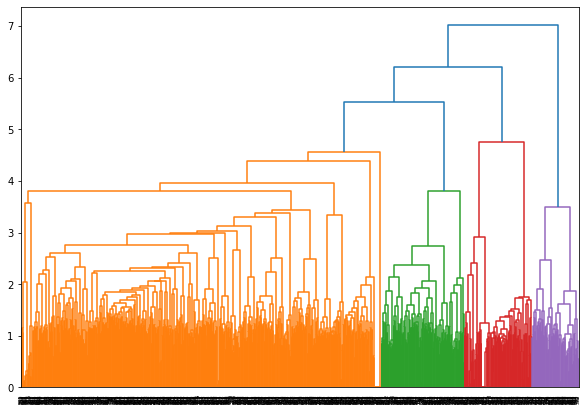

In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(Profesional_test.toarray(), 'ward')

labelList = range(1, 974)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [44]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=50, affinity='cosine', linkage='complete')
cluster.fit_predict(Profesional_test.toarray())

array([ 4,  2,  2, 18, 25,  2, 18,  2,  2, 37,  7,  2,  2, 40, 39, 36,  8,
        8, 30, 12, 49, 40,  3, 37, 23,  2,  9,  2, 41,  5,  2,  9,  2,  2,
        2,  9,  2,  2,  2,  2,  2, 36, 11, 22, 10,  6,  2,  8,  8, 12, 12,
        4, 12, 48,  6, 17,  9, 49, 32,  2,  2, 12,  2,  3, 12, 39,  3,  2,
        8,  2,  8, 37,  6,  2,  2,  5, 47, 16,  4,  8, 12,  4, 40, 43, 39,
        2, 12,  2,  8, 37, 12, 24, 30,  8,  6, 12, 32, 15, 35,  2,  2, 36,
        2,  8, 18,  9,  3, 37,  2, 10, 36, 12,  2,  0, 21, 15, 15,  2,  1,
       44,  2,  8,  2,  2, 23,  6,  2, 23,  2,  8, 42, 15, 24, 12, 38,  2,
        8, 42,  2, 15,  1, 34, 15, 39, 17,  3,  8, 12,  8, 15, 31, 12, 23,
        8,  2, 14, 18,  5,  2,  5,  0, 21, 14,  2,  2, 21,  3, 48, 12, 38,
       12, 33, 14, 13,  6,  1, 11, 27,  6, 33,  0, 37,  4, 12, 40, 15, 24,
        2,  1, 13, 47, 43, 19, 29, 31,  2, 12, 27,  2,  2, 29,  9, 27,  2,
       32,  2, 25,  8, 12,  2, 13, 45,  2, 23,  2,  2, 23,  0, 36,  6, 23,
       11,  8,  2,  3, 12

Automatically created module for IPython interactive environment


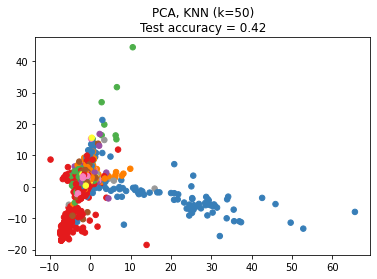

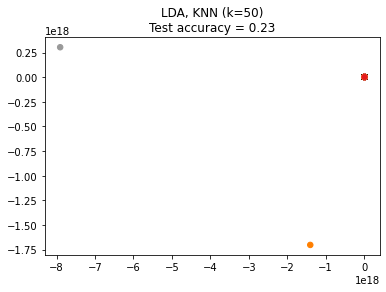

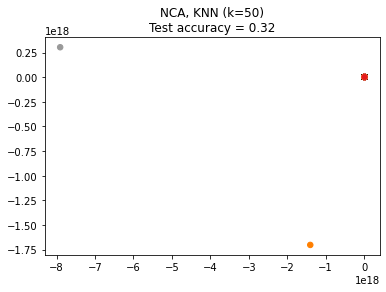

In [73]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

print(__doc__)

n_neighbors = 50

random_state = 0

# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2, random_state=random_state))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=2))

# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(StandardScaler(),
                    NeighborhoodComponentsAnalysis(n_components=2,
                                                   random_state=random_state))

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Make a list of the methods to be compared
dim_reduction_methods = [('PCA', pca), ('LDA', lda), ('NCA', nca)]


for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    # plt.subplot(1, 3, i + 1, aspect=1)

    # Fit the method's model
    model.fit(Profesional_test.toarray(), cluster.labels_)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(Profesional_test.toarray()), cluster.labels_)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(Profesional_test.toarray()), cluster.labels_)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(Profesional_test.toarray())

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=cluster.labels_, s=30, cmap='Set1')
    plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name,
                                                              n_neighbors,
                                                              acc_knn))
plt.show()

In [74]:
plt.figure(figsize=(10, 7))
plt.scatter(data.toarray()[:,0], data.toarray()[:,1], c=cluster.labels_, cmap='rainbow')

AttributeError: 'PCA' object has no attribute 'toarray'

<Figure size 720x504 with 0 Axes>